In [33]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
with open("augmentations_results_latest16_04_51", "rb") as bfile:
    data = pickle.load(bfile)

In [35]:
with open("augmentations_results_latest11_22_21", "rb") as bfile:
    data.update(pickle.load(bfile))

In [37]:
def dict_to_list(d):
    return [v for k,v in d.items()]

In [38]:
for aug in data:
    for ind,shit in enumerate(["loss_train", "loss_test", "accuracy_test"]):
        data[aug][shit] = dict_to_list(data[aug][shit])

In [70]:
cl = lambda x: x[:50]

def cut_legend(lg):
    return "\n".join(list(map(cl, lg.split("\n"))))
#     return repr(lg)[10:].replace(" ", "").replace("\n", "->")[:-10]

In [48]:
repr(list(data.keys())[0])[10:].replace(" ", "").replace("\n", "->")[:-10]

'RandomVerticalFlip(p=0.5)->RandomGrayscale(p=0.1)->RandomSolarize(threshold=192.0'

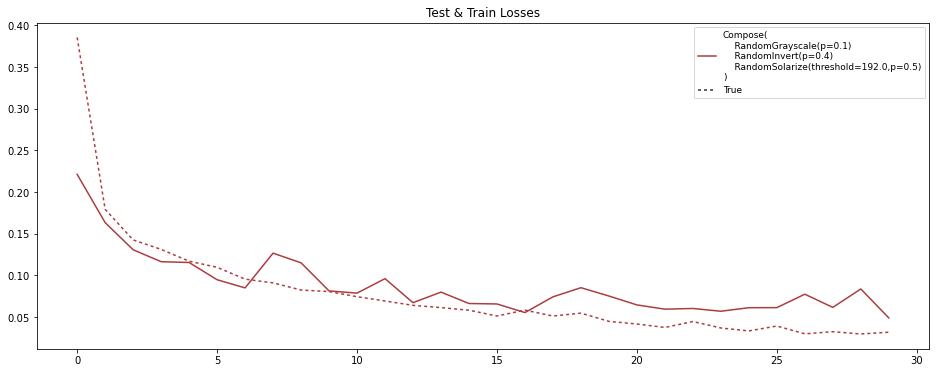

In [86]:
palette = sns.color_palette(palette="vlag_r", n_colors=len(data))
plt.figure(figsize=(16, 6))
plt.title("Test & Train Losses")

for ind, (k,v) in enumerate(best_worked_composes.items()):
    sns.lineplot(x=range(30), y=v["loss_test"], color=palette[ind], label=cut_legend(repr(k)))
    sns.lineplot(x=range(30), y=v["loss_train"], style=True, dashes=[(2,2)], color=palette[ind])
plt.legend(prop={'size': 9})

In [56]:
def acc_tnsr_to_val(tnsr):
    return [i.cpu().item() for i in tnsr]

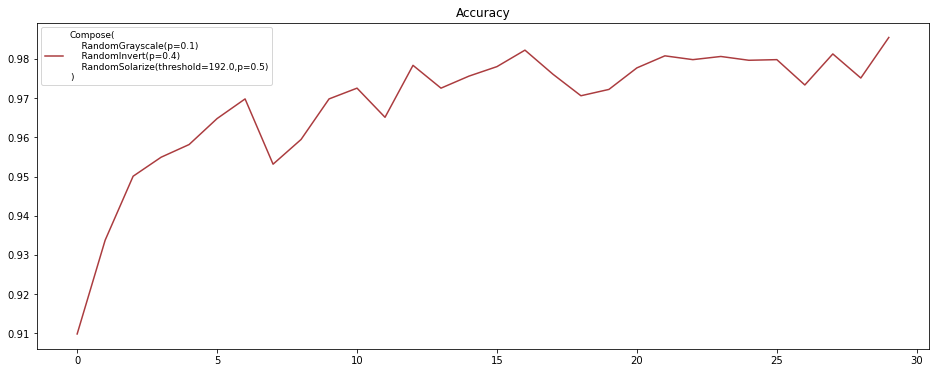

In [87]:
plt.figure(figsize=(16, 6))
plt.title("Accuracy")

for ind, (k,v) in enumerate(best_worked_composes.items()):
    sns.lineplot(x=range(30), y=acc_tnsr_to_val(v["accuracy_test"]), color=palette[ind], label=cut_legend(repr(k)))
plt.legend(prop={'size': 9})

In [59]:
well_worked_composes = {
    k:v for k,v in data.items()
    if v["accuracy_test"][-1] > 0.98
}

len(well_worked_composes)

In [64]:
bad_worked_composes = {
    k:v for k,v in data.items()
    if v["accuracy_test"][-1] < 0.95
}

len(bad_worked_composes)

8

In [78]:
print("\n".join([cut_legend(repr(i)) for i in list(well_worked_composes.keys())]))

Compose(
    RandomVerticalFlip(p=0.5)
    RandomGrayscale(p=0.1)
    RandomSolarize(threshold=192.0,p=0.5)
)
Compose(
    RandomVerticalFlip(p=0.5)
    RandomGrayscale(p=0.1)
    RandomAdjustSharpness(sharpness_factor=2,p=0.5
)
Compose(
    RandomVerticalFlip(p=0.5)
    RandomInvert(p=0.4)
    RandomAutocontrast(p=0.5)
)
Compose(
    RandomVerticalFlip(p=0.5)
    RandomSolarize(threshold=192.0,p=0.5)
    RandomAdjustSharpness(sharpness_factor=2,p=0.5
)
Compose(
    RandomVerticalFlip(p=0.5)
    RandomAdjustSharpness(sharpness_factor=2,p=0.5
    RandomAutocontrast(p=0.5)
)
Compose(
    RandomGrayscale(p=0.1)
    RandomInvert(p=0.4)
    RandomSolarize(threshold=192.0,p=0.5)
)
Compose(
    RandomGrayscale(p=0.1)
    RandomInvert(p=0.4)
    RandomAdjustSharpness(sharpness_factor=2,p=0.5
)
Compose(
    RandomGrayscale(p=0.1)
    RandomInvert(p=0.4)
    RandomAutocontrast(p=0.5)
)
Compose(
    RandomInvert(p=0.4)
    RandomAdjustSharpness(sharpness_factor=2,p=0.5
    RandomAutocontrast(p=0.

In [82]:
best_worked_composes = {
    k:v for k,v in data.items()
    if v["accuracy_test"][-1] > 0.985
}

len(best_worked_composes)

1

In [92]:
list(best_worked_composes.values())[0]["accuracy_test"]

[tensor(0.9098, device='cuda:0'),
 tensor(0.9338, device='cuda:0'),
 tensor(0.9501, device='cuda:0'),
 tensor(0.9549, device='cuda:0'),
 tensor(0.9582, device='cuda:0'),
 tensor(0.9648, device='cuda:0'),
 tensor(0.9698, device='cuda:0'),
 tensor(0.9531, device='cuda:0'),
 tensor(0.9594, device='cuda:0'),
 tensor(0.9698, device='cuda:0'),
 tensor(0.9725, device='cuda:0'),
 tensor(0.9651, device='cuda:0'),
 tensor(0.9783, device='cuda:0'),
 tensor(0.9725, device='cuda:0'),
 tensor(0.9756, device='cuda:0'),
 tensor(0.9780, device='cuda:0'),
 tensor(0.9822, device='cuda:0'),
 tensor(0.9761, device='cuda:0'),
 tensor(0.9706, device='cuda:0'),
 tensor(0.9722, device='cuda:0'),
 tensor(0.9777, device='cuda:0'),
 tensor(0.9808, device='cuda:0'),
 tensor(0.9798, device='cuda:0'),
 tensor(0.9806, device='cuda:0'),
 tensor(0.9796, device='cuda:0'),
 tensor(0.9798, device='cuda:0'),
 tensor(0.9733, device='cuda:0'),
 tensor(0.9813, device='cuda:0'),
 tensor(0.9751, device='cuda:0'),
 tensor(0.9855